<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/ml-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

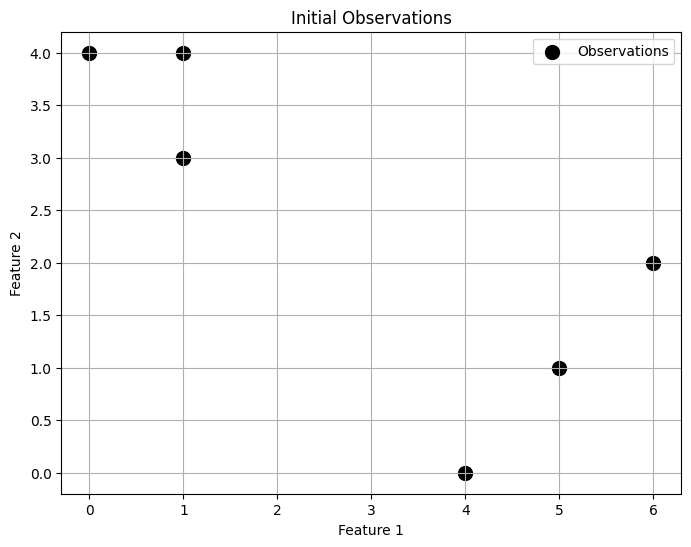

In [ ]:
import matplotlib.pyplot as plt

# Data
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]

# Convert observations to arrays
x = [obs[0] for obs in observations]
y = [obs[1] for obs in observations]

# Plot the observations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='black', s=100, label='Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Initial Observations')
plt.legend()
plt.grid(True)
plt.show()

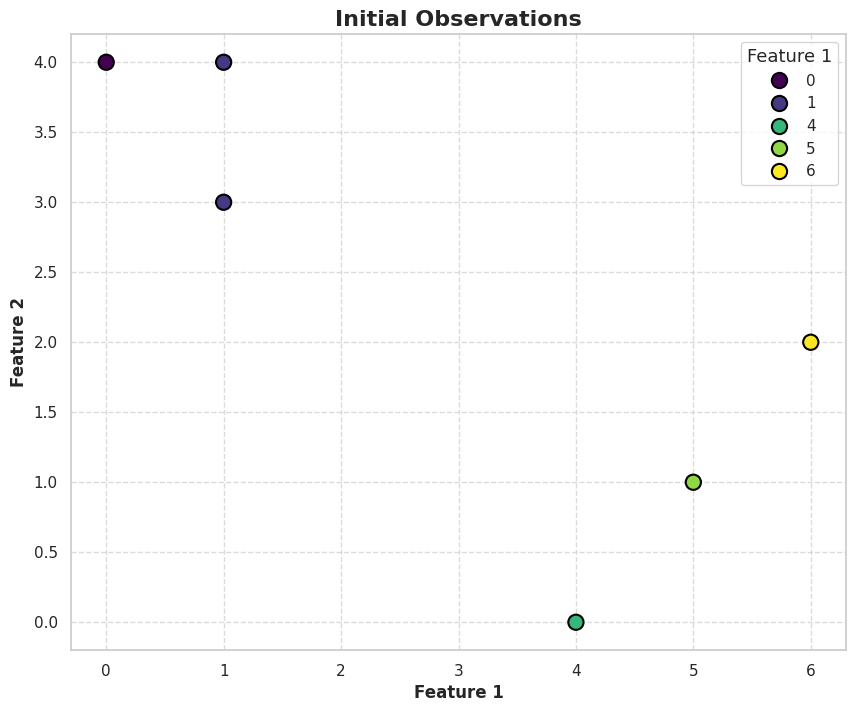

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]

# Convert observations to a DataFrame
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])

# Set the style and palette for better visuals
sns.set(style="whitegrid", palette="pastel")

# Plot the observations using Seaborn
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Feature 1', y='Feature 2', data=df, s=120, hue='Feature 1', palette='viridis', edgecolor='black', linewidth=1.5)

# Customize the plot
plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
plt.title('Initial Observations', fontsize=16, fontweight='bold')
plt.legend(title='Feature 1', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



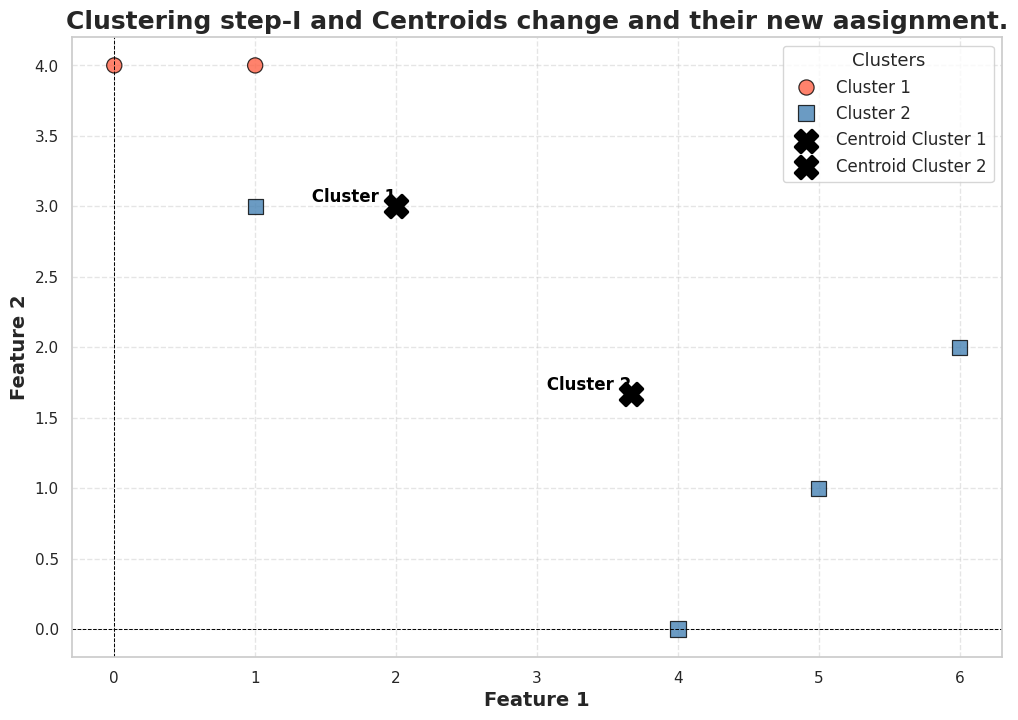

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the observations and their cluster labels
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
labels = ['Cluster 1', 'Cluster 2', 'Cluster 1', 'Cluster 2', 'Cluster 2', 'Cluster 2']
centroids = {'Cluster 1': (2, 3), 'Cluster 2': (3.67, 1.67)}

# Convert observations to a DataFrame for better handling with Seaborn
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels

# Set the style and palette for better visuals
sns.set(style="whitegrid")
palette = {'Cluster 1': '#FF6347', 'Cluster 2': '#4682B4'}  # Tomato and SteelBlue

# Plot the observations using Seaborn
plt.figure(figsize=(12, 9))
sns.scatterplot(x='Feature 1', y='Feature 2', data=df, hue='Cluster', palette=palette, s=120, edgecolor='black', alpha=0.8, style='Cluster', markers=['o', 's'])

# Plot the centroids with enhanced styling
for label, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], c='black', marker='X', s=250, linewidth=2.5, label=f'Centroid {label}')
    plt.text(centroid[0], centroid[1], f' {label}', fontsize=12, ha='right', va='bottom', color='black', weight='bold')

# Enhance the plot
plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
plt.title('Clustering step-I and Centroids change and their new aasignment.', fontsize=18, fontweight='bold')
plt.legend(title='Clusters', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.7)
plt.gca().set_aspect('equal', adjustable='box')

# Add a background color for better contrast
# plt.gca().set_facecolor('#f0f0f0')

plt.show()



In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define observations, colors, and markers
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
labels = ['Cluster 1', 'Cluster 2', 'Cluster 1', 'Cluster 2', 'Cluster 2', 'Cluster 2']
colors = {'Cluster 1': '#FF6347', 'Cluster 2': '#4682B4'}  # Tomato and SteelBlue
markers = ['o', 's']  # Circle and square for clusters
centroids = {'Cluster 1': (2, 3), 'Cluster 2': (3.67, 1.67)}

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

def assign_clusters(observations, centroids):
    clusters = []
    for point in observations:
        distances = [euclidean_distance(point, centroid) for centroid in centroids.values()]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def compute_centroids(observations, clusters, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = [observations[j] for j in range(len(observations)) if clusters[j] == i]
        if points_in_cluster:
            new_centroid = np.mean(points_in_cluster, axis=0)
            new_centroids.append(tuple(new_centroid))
        else:
            new_centroids.append(centroids[list(centroids.keys())[i]])  # Handle empty clusters
    return new_centroids

# Initialize centroids
initial_centroids = [(2, 3), (3.67, 1.67)]
k = 2
iterations = 0
previous_centroids = None

while previous_centroids != initial_centroids:
    iterations += 1
    previous_centroids = initial_centroids

    # Assign clusters
    clusters = assign_clusters(observations, initial_centroids)

    # Compute new centroids
    new_centroids = compute_centroids(observations, clusters, k)

    # Plot clusters and centroids
    plt.figure(figsize=(12, 9))

    # Plot observations
    for i, (point, cluster) in enumerate(zip(observations, clusters)):
        plt.scatter(point[0], point[1], c=colors[f'Cluster {cluster+1}'], marker=markers[cluster], label=f'Observation {i+1}', s=150, edgecolor='black', alpha=0.8)
        plt.text(point[0], point[1], f' {i+1}', fontsize=12, ha='right', va='bottom', color='black')

    # Plot centroids
    for i, (label, centroid) in enumerate(centroids.items()):
        plt.scatter(centroid[0], centroid[1], c='black', marker='X', s=300, linewidth=2.5, label=f'Centroid {label}')
        plt.text(centroid[0], centroid[1], f' {label}', fontsize=12, ha='left', va='top', color='black', weight='bold')

    # Enhance the plot
    plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
    plt.title(f'Iteration {iterations}: Clustering and Centroids', fontsize=18, fontweight='bold')
    plt.legend(title='Clusters', title_fontsize='13', fontsize='12', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.7)
    plt.gca().set_aspect('equal', adjustable='box')

    # Add a custom background color
    plt.gca().set_facecolor('#f0f0f0')

    plt.show()

    initial_centroids = new_centroids


AttributeError: 'list' object has no attribute 'values'

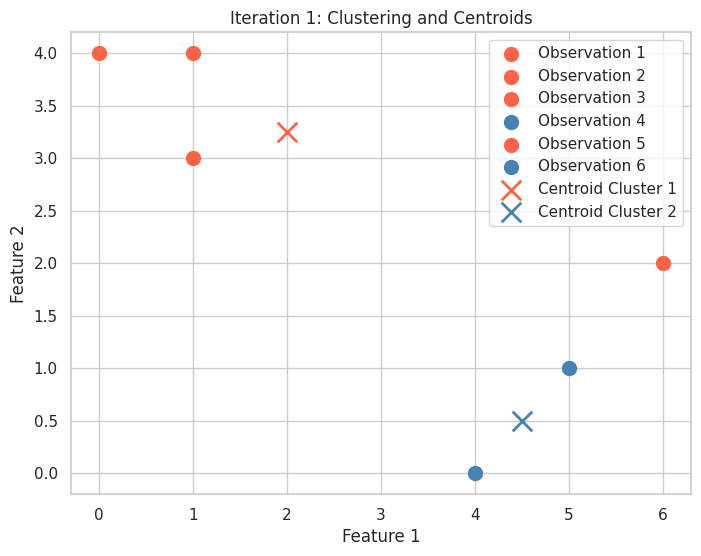

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

def assign_clusters(observations, centroids):
    clusters = []
    for point in observations:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def compute_centroids(observations, clusters, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = [observations[j] for j in range(len(observations)) if clusters[j] == i]
        if points_in_cluster:
            new_centroid = np.mean(points_in_cluster, axis=0)
            new_centroids.append(tuple(new_centroid))
        else:
            new_centroids.append(centroids[i])  # No points in cluster
    return new_centroids

# Initial centroids
initial_centroids = [(3, 2.75), (2.5, 1.5)]
k = 2

iterations = 0
previous_centroids = None

while previous_centroids != initial_centroids:
    iterations += 1
    previous_centroids = initial_centroids

    # Assign clusters
    clusters = assign_clusters(observations, initial_centroids)

    # Compute new centroids
    new_centroids = compute_centroids(observations, clusters, k)

    # Plot clusters and centroids
    plt.figure(figsize=(8, 6))
    for i in range(len(observations)):
        plt.scatter(observations[i][0], observations[i][1], c=colors[f'Cluster {clusters[i]+1}'], label=f'Observation {i+1}', s=100)
    for i, centroid in enumerate(new_centroids):
        plt.scatter(centroid[0], centroid[1], c=colors[f'Cluster {i+1}'], marker='x', s=200, linewidth=2, label=f'Centroid Cluster {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Iteration {iterations}: Clustering and Centroids')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Define the observations and initial centroids
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
initial_centroids = np.array([[2, 3], [3.67, 1.67]])

iterations = 10
X = np.array(observations)

for i in range(iterations):
    kmeans = KMeans(
        n_clusters=2,
        init=initial_centroids,
        n_init=1,
        max_iter=1,
        random_state=1
    )
    kmeans.fit(X)
    initial_centroids = kmeans.cluster_centers_
    print(f'Iteration {i}: Centroid 1: {initial_centroids[0]}, Centroid 2: {initial_centroids[1]}')


Iteration 0: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 1: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 2: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 3: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 4: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 5: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 6: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 7: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 8: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]
Iteration 9: Centroid 1: [0.66666667 3.66666667], Centroid 2: [5. 1.]


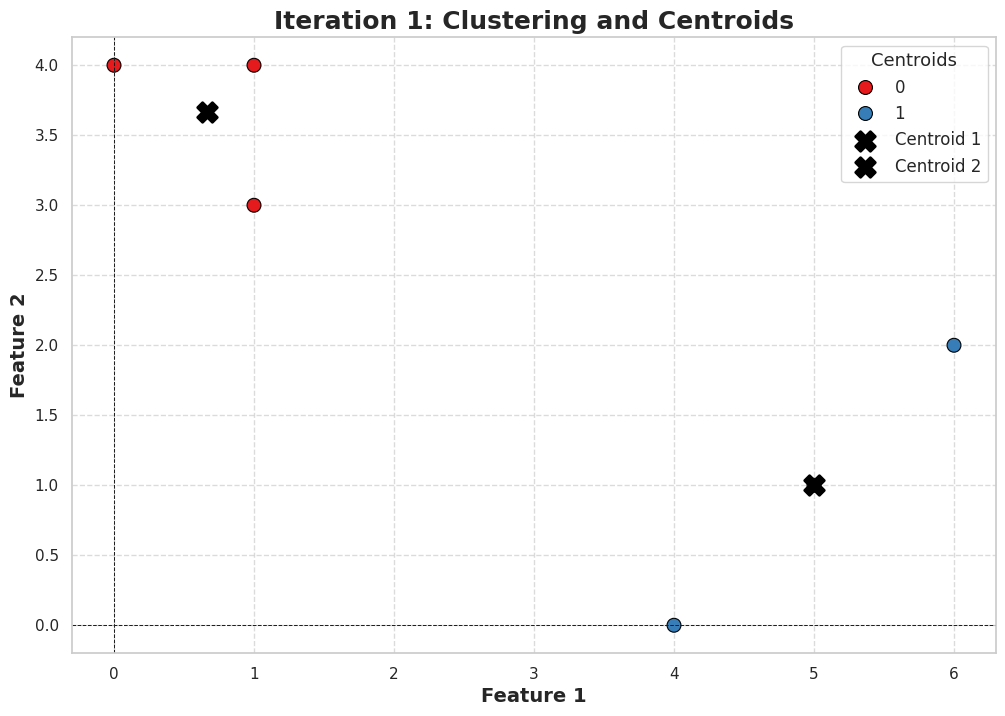

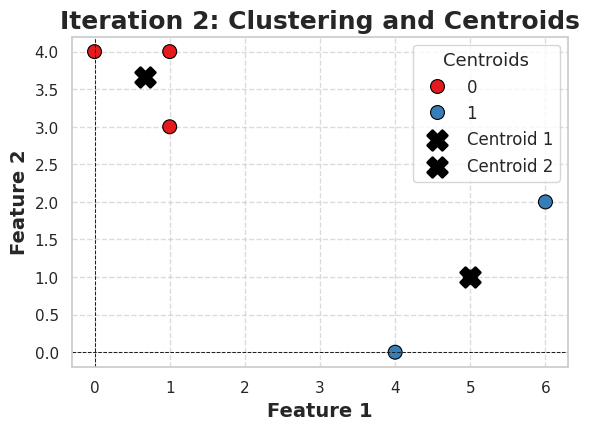

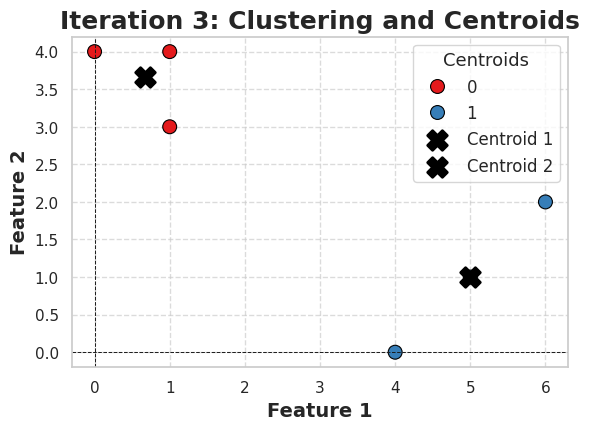

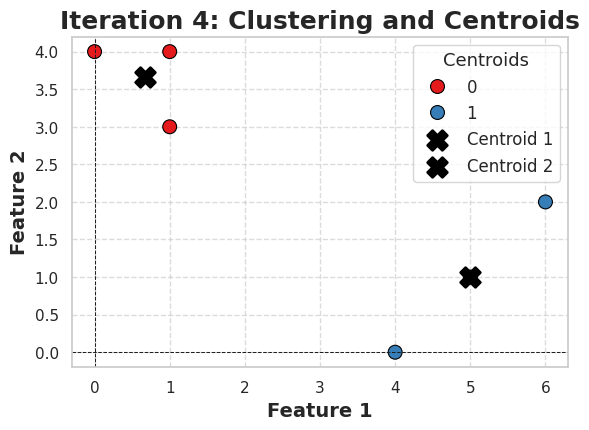

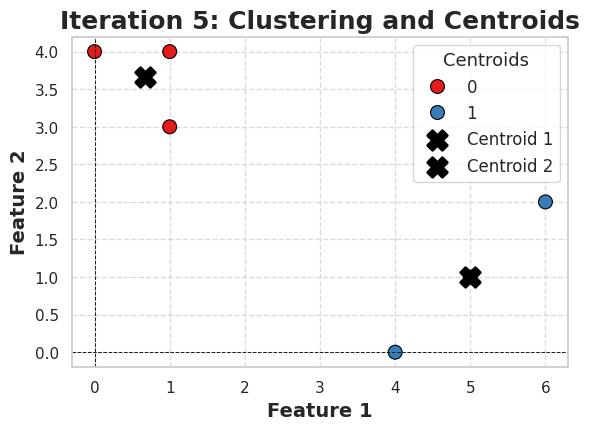

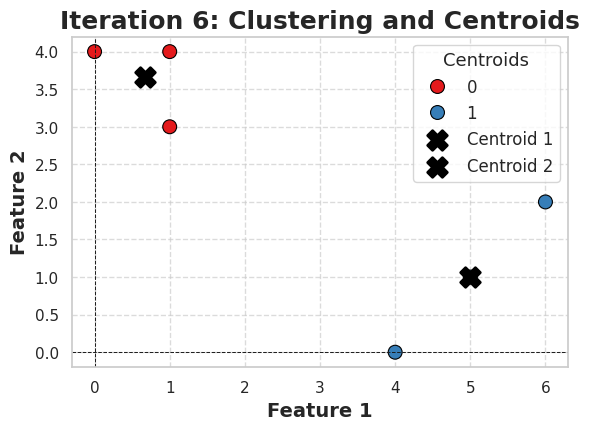

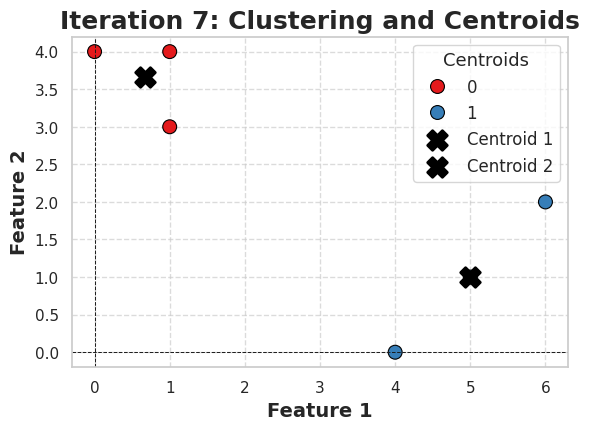

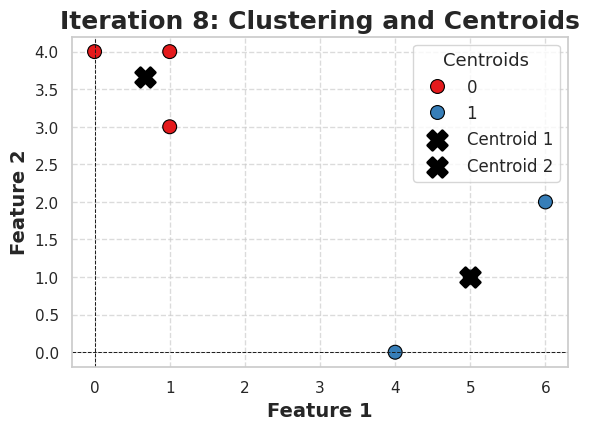

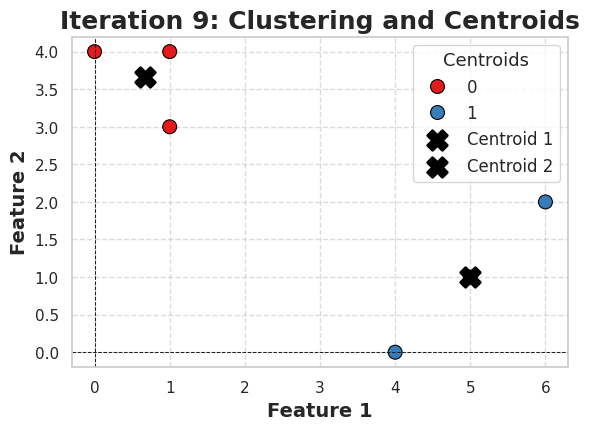

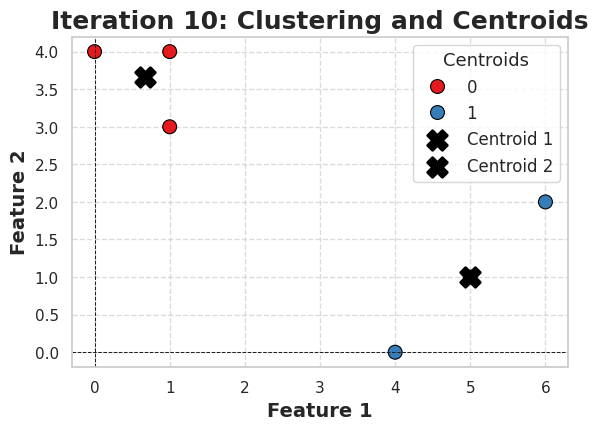

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Define the observations and initial centroids
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
initial_centroids = np.array([[2, 3], [3.67, 1.67]])
X = np.array(observations)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(12, 8))

# Prepare data for plotting
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])

# Perform clustering iterations and plot
for i in range(10):
    kmeans = KMeans(
        n_clusters=2,
        init=initial_centroids,
        n_init=1,
        max_iter=1,
        random_state=1
    )
    kmeans.fit(X)
    initial_centroids = kmeans.cluster_centers_

    # Assign clusters
    labels = kmeans.labels_
    df['Cluster'] = labels

    # Clear previous plots
    plt.clf()

    # Plot the observations
    sns.scatterplot(x='Feature 1', y='Feature 2', data=df, hue='Cluster', palette='Set1', s=100, edgecolor='black')

    # Plot the centroids
    for j, centroid in enumerate(initial_centroids):
        plt.scatter(centroid[0], centroid[1], c='black', marker='X', s=200, linewidth=2, label=f'Centroid {j+1}')

    # Enhance the plot
    plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
    plt.title(f'Iteration {i+1}: Clustering and Centroids', fontsize=18, fontweight='bold')
    plt.legend(title='Centroids', title_fontsize='13', fontsize='12', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()


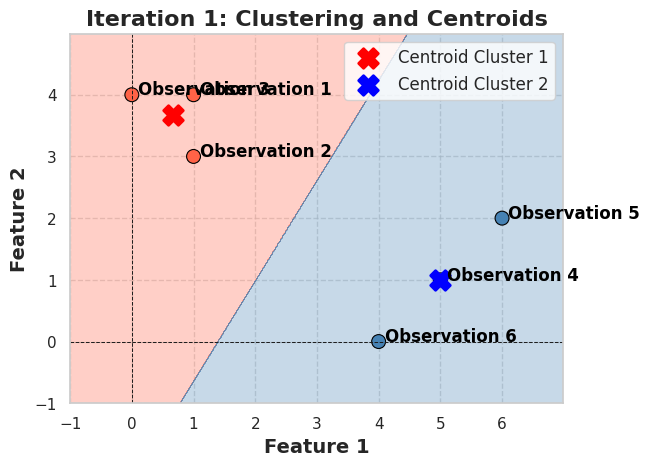

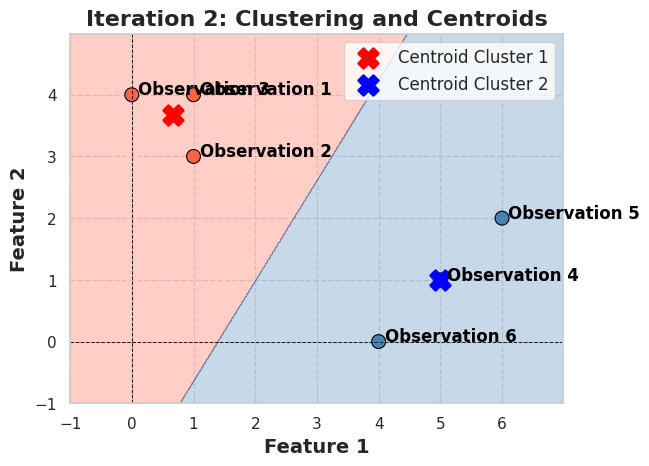

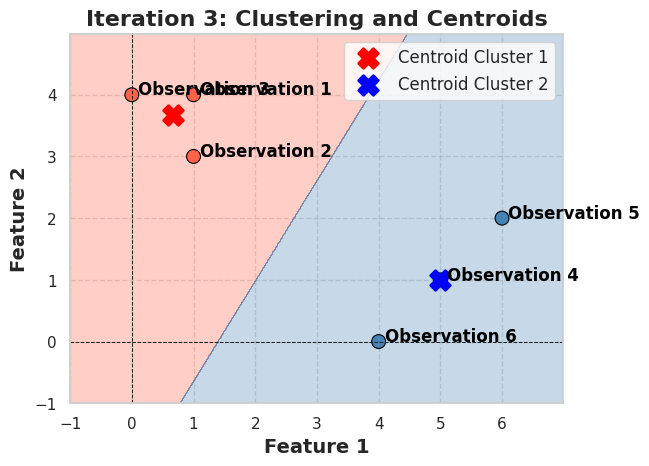

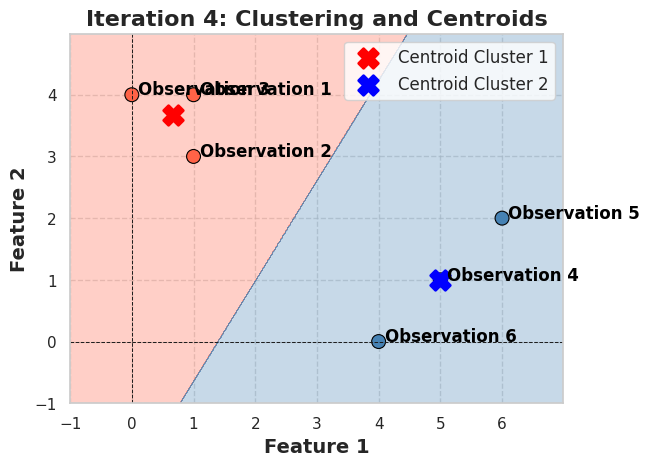

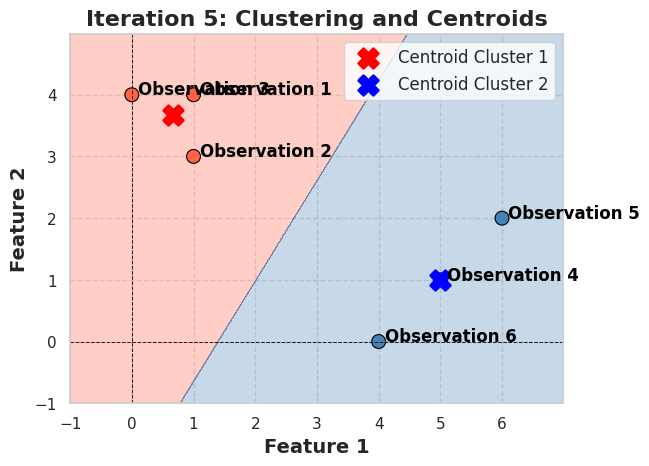

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Define the observations and initial centroids
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
initial_centroids = np.array([[2, 3], [3.67, 1.67]])
X = np.array(observations)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Prepare data for plotting
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])
df['Observation'] = ['Observation 1', 'Observation 2', 'Observation 3', 'Observation 4', 'Observation 5', 'Observation 6']

# Define custom color palette for clusters
palette = sns.color_palette(['#FF6347', '#4682B4'])  # Tomato and SteelBlue

# Perform 5 clustering iterations and plot
for i in range(5):  # Run for 5 iterations
    kmeans = KMeans(
        n_clusters=2,
        init=initial_centroids,
        n_init=1,
        max_iter=1,
        random_state=1
    )
    kmeans.fit(X)
    initial_centroids = kmeans.cluster_centers_

    # Assign clusters
    labels = kmeans.labels_
    df['Cluster'] = labels

    # Clear previous plots
    plt.clf()

    # Create a grid for background color
    x_min, x_max = df['Feature 1'].min() - 1, df['Feature 1'].max() + 1
    y_min, y_max = df['Feature 2'].min() - 1, df['Feature 2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the background color
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(palette))

    # Plot the observations
    sns.scatterplot(x='Feature 1', y='Feature 2', data=df, hue='Cluster', palette=palette, s=100, edgecolor='black', legend=False)

    # Annotate observations
    for j in range(df.shape[0]):
        plt.text(df['Feature 1'][j] + 0.1, df['Feature 2'][j], df['Observation'][j], horizontalalignment='left', size='medium', color='black', weight='semibold')

    # Plot the centroids
    plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], c='red', marker='X', s=200, linewidth=2, label='Centroid Cluster 1')
    plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], c='blue', marker='X', s=200, linewidth=2, label='Centroid Cluster 2')

    # Enhance the plot
    plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
    plt.title(f'Iteration {i+1}: Clustering and Centroids', fontsize=16, fontweight='bold')
    plt.legend(title='', fontsize='12', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()


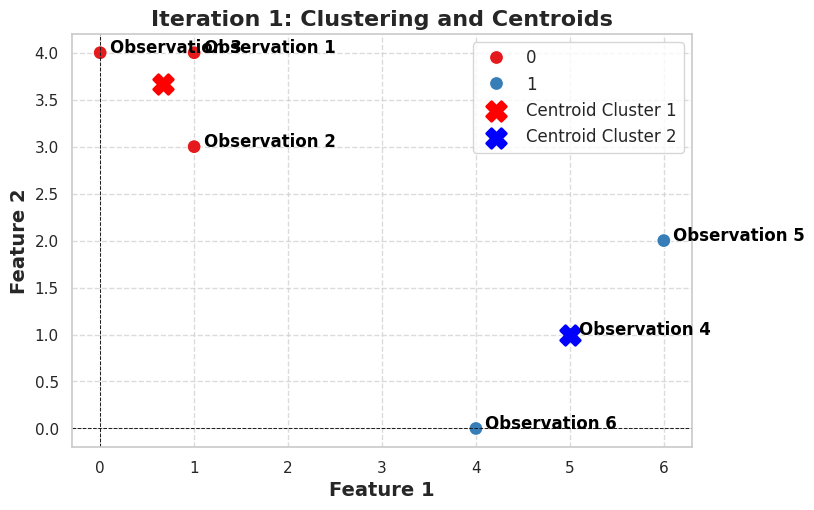

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Define the observations and initial centroids
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
initial_centroids = np.array([[2, 3], [4, 1]])
X = np.array(observations)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(8, 6))

# Perform clustering iterations and plot
kmeans = KMeans(
    n_clusters=2,
    init=initial_centroids,
    n_init=1,
    max_iter=1,
    random_state=1
)
kmeans.fit(X)
initial_centroids = kmeans.cluster_centers_

# Assign clusters
labels = kmeans.labels_

# Prepare data for plotting
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels
df['Observation'] = ['Observation 1', 'Observation 2', 'Observation 3', 'Observation 4', 'Observation 5', 'Observation 6']

# Clear previous plots
plt.clf()

# Plot the observations
sns.scatterplot(x='Feature 1', y='Feature 2', data=df, hue='Cluster', palette='Set1', s=100)

# Plot the centroids
plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], c='red', marker='X', s=200, linewidth=2, label='Centroid Cluster 1')
plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], c='blue', marker='X', s=200, linewidth=2, label='Centroid Cluster 2')

# Annotate observations
for i in range(df.shape[0]):
    plt.text(df['Feature 1'][i] + 0.1, df['Feature 2'][i], df['Observation'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')

# Enhance the plot
plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
plt.title('Iteration 1: Clustering and Centroids', fontsize=16, fontweight='bold')
plt.legend(title='', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


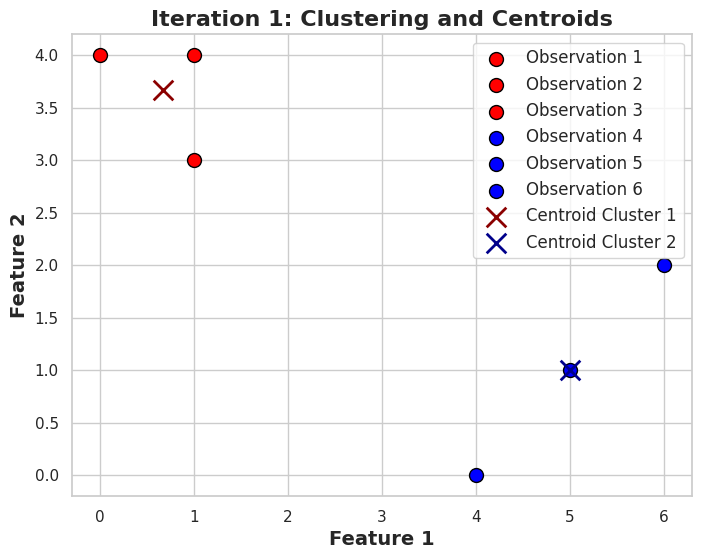

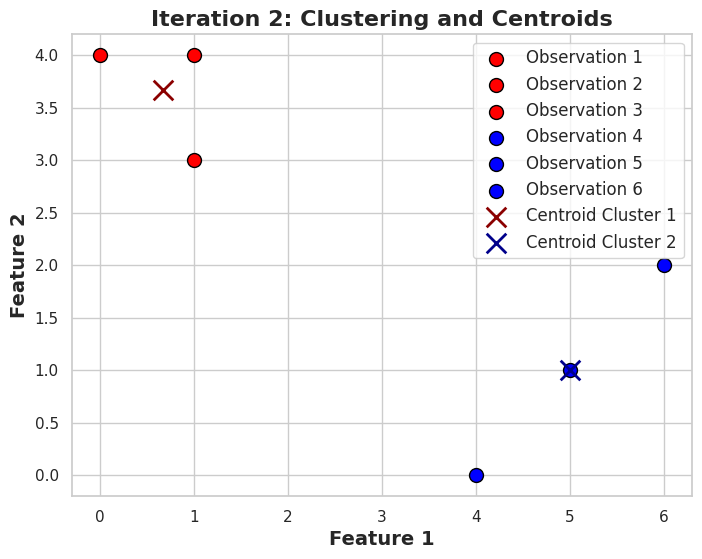

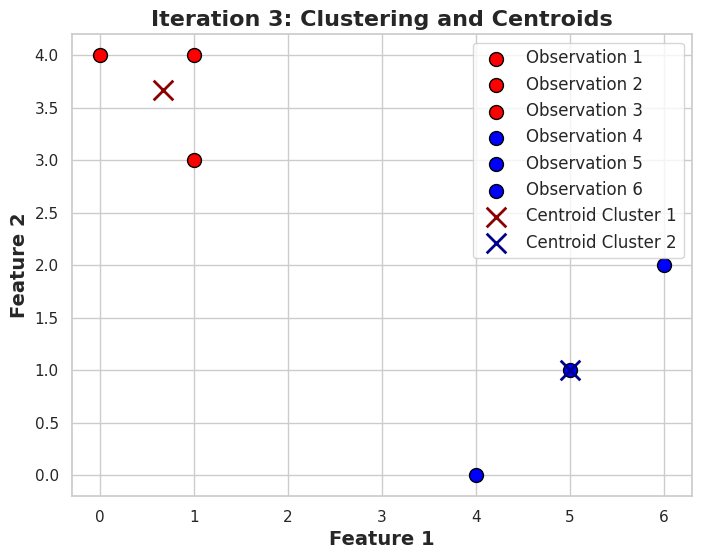

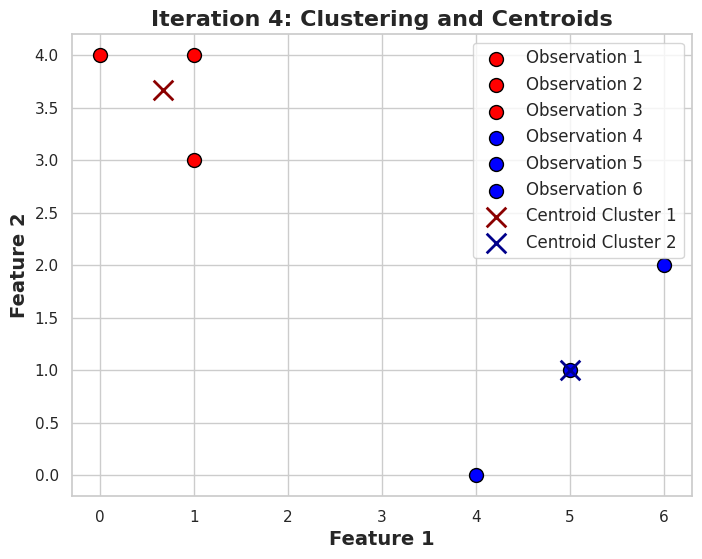

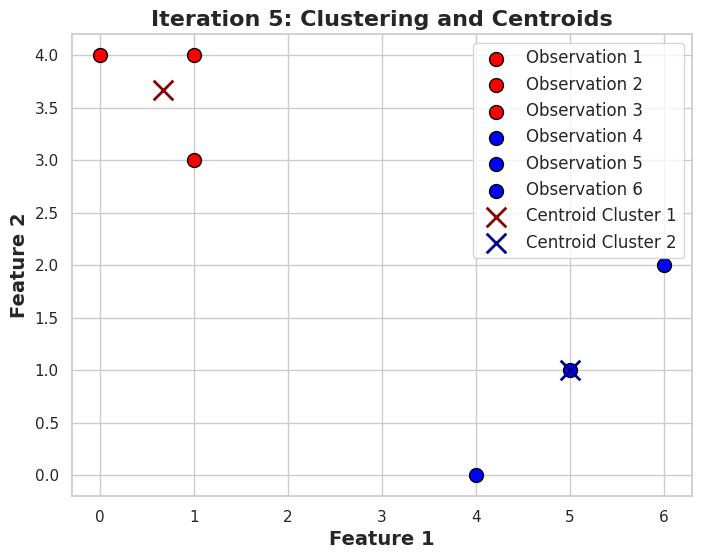

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Define the observations and initial centroids
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
initial_centroids = np.array([[2, 3], [3.67, 1.67]])
X = np.array(observations)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Prepare data for plotting
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])
df['Observation'] = ['Observation 1', 'Observation 2', 'Observation 3', 'Observation 4', 'Observation 5', 'Observation 6']

# Define custom color palette for clusters
colors = {0: 'red', 1: 'blue'}
centroid_colors = {0: 'darkred', 1: 'darkblue'}

# Perform 5 clustering iterations and plot
for i in range(5):  # Run for 5 iterations
    kmeans = KMeans(
        n_clusters=2,
        init=initial_centroids,
        n_init=1,
        max_iter=1,
        random_state=1
    )
    kmeans.fit(X)
    initial_centroids = kmeans.cluster_centers_

    # Assign clusters
    labels = kmeans.labels_
    df['Cluster'] = labels

    # Clear previous plots
    plt.figure(figsize=(8, 6))

    # Plot the observations
    for j in range(df.shape[0]):
        plt.scatter(df['Feature 1'][j], df['Feature 2'][j], c=colors[labels[j]], label=f'Observation {j+1}', s=100, edgecolor='black')

    # Plot the new centroids
    for k, centroid in enumerate(initial_centroids):
        plt.scatter(centroid[0], centroid[1], c=centroid_colors[k], marker='x', s=200, linewidth=2, label=f'Centroid Cluster {k+1}')

    plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
    plt.title(f'Iteration {i+1}: Clustering and Centroids', fontsize=16, fontweight='bold')
    plt.legend(title='', fontsize='12')
    plt.grid(True)
    plt.show()


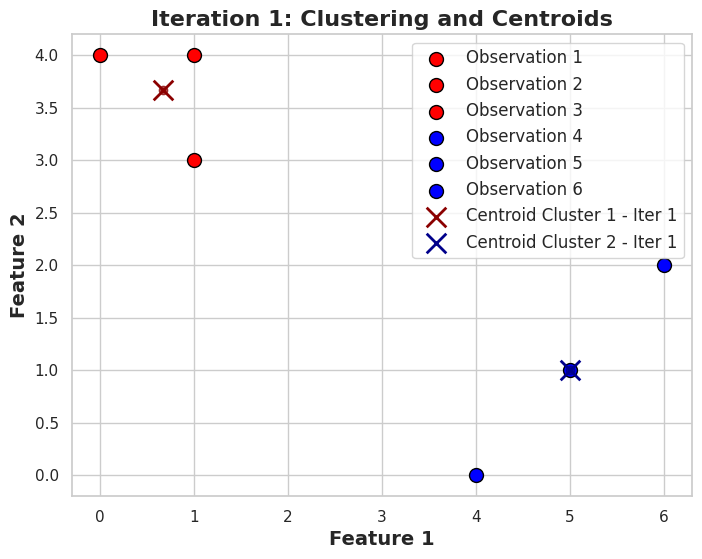

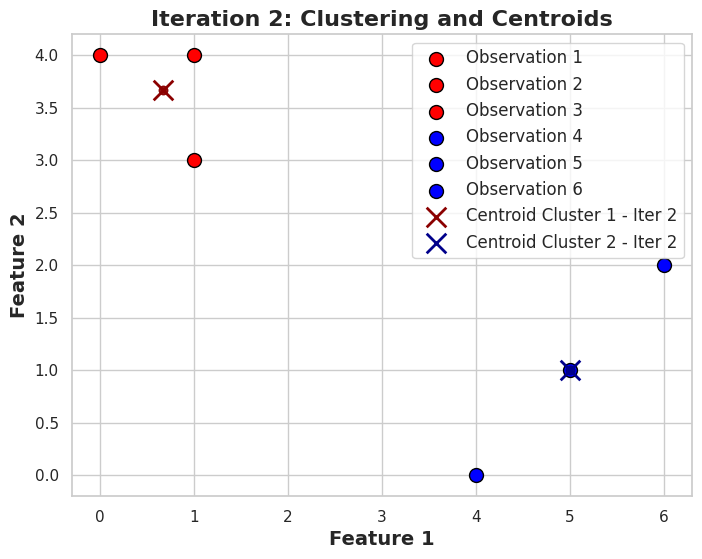

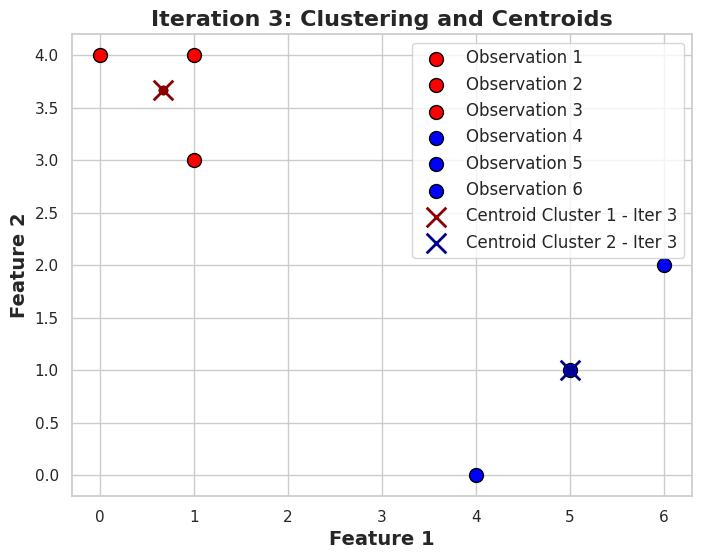

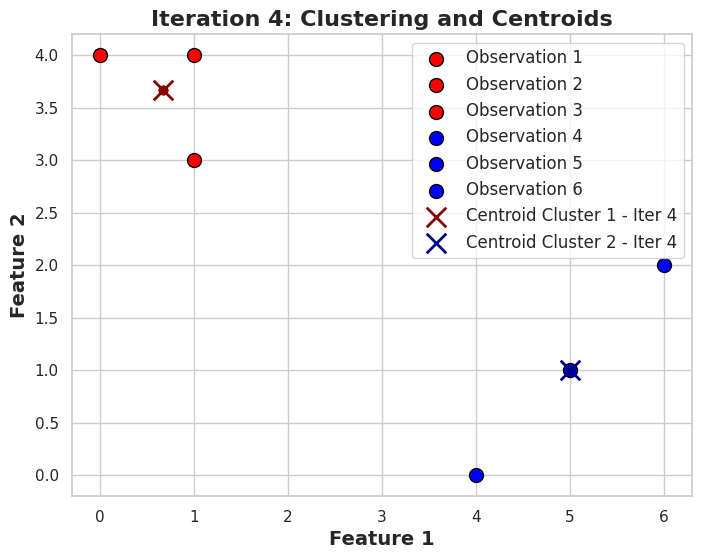

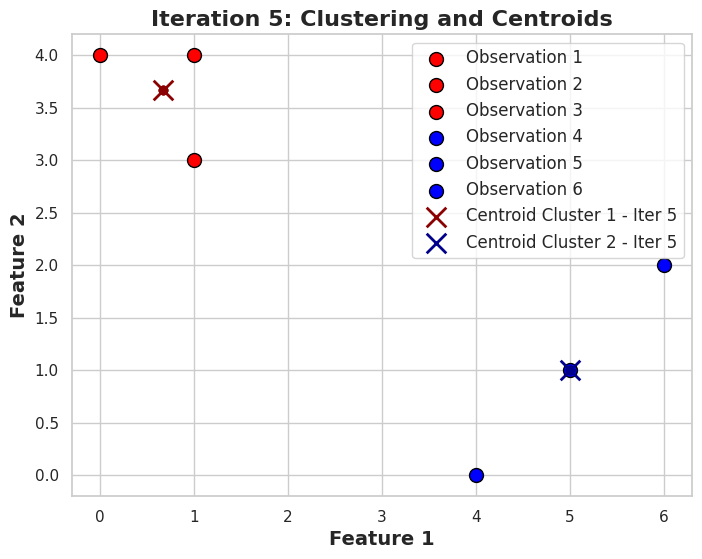

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Define the observations and initial centroids
observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]
initial_centroids = np.array([[2, 3], [3.67, 1.67]])
X = np.array(observations)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Prepare data for plotting
df = pd.DataFrame(observations, columns=['Feature 1', 'Feature 2'])
df['Observation'] = ['Observation 1', 'Observation 2', 'Observation 3', 'Observation 4', 'Observation 5', 'Observation 6']

# Define custom color palette for clusters
colors = {0: 'red', 1: 'blue'}
centroid_colors = {0: 'darkred', 1: 'darkblue'}

# Initialize lists to store centroid history
centroid_history = {0: [], 1: []}

# Perform 5 clustering iterations and plot
for i in range(5):  # Run for 5 iterations
    kmeans = KMeans(
        n_clusters=2,
        init=initial_centroids,
        n_init=1,
        max_iter=1,
        random_state=1
    )
    kmeans.fit(X)
    initial_centroids = kmeans.cluster_centers_

    # Assign clusters
    labels = kmeans.labels_
    df['Cluster'] = labels

    # Update centroid history
    for k in range(2):
        centroid_history[k].append(initial_centroids[k])

    # Clear previous plots
    plt.figure(figsize=(8, 6))

    # Plot the observations
    for j in range(df.shape[0]):
        plt.scatter(df['Feature 1'][j], df['Feature 2'][j], c=colors[labels[j]], label=f'Observation {j+1}', s=100, edgecolor='black')

    # Plot the centroids
    for k, centroid in enumerate(initial_centroids):
        plt.scatter(centroid[0], centroid[1], c=centroid_colors[k], marker='x', s=200, linewidth=2, label=f'Centroid Cluster {k+1} - Iter {i+1}')

    # Plot centroid trajectories
    for k in range(2):
        history = np.array(centroid_history[k])
        plt.plot(history[:, 0], history[:, 1], 'o--', color=centroid_colors[k], alpha=0.7)

    plt.xlabel('Feature 1', fontsize=14, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=14, fontweight='bold')
    plt.title(f'Iteration {i+1}: Clustering and Centroids', fontsize=16, fontweight='bold')
    plt.legend(title='', fontsize='12')
    plt.grid(True)
    plt.show()


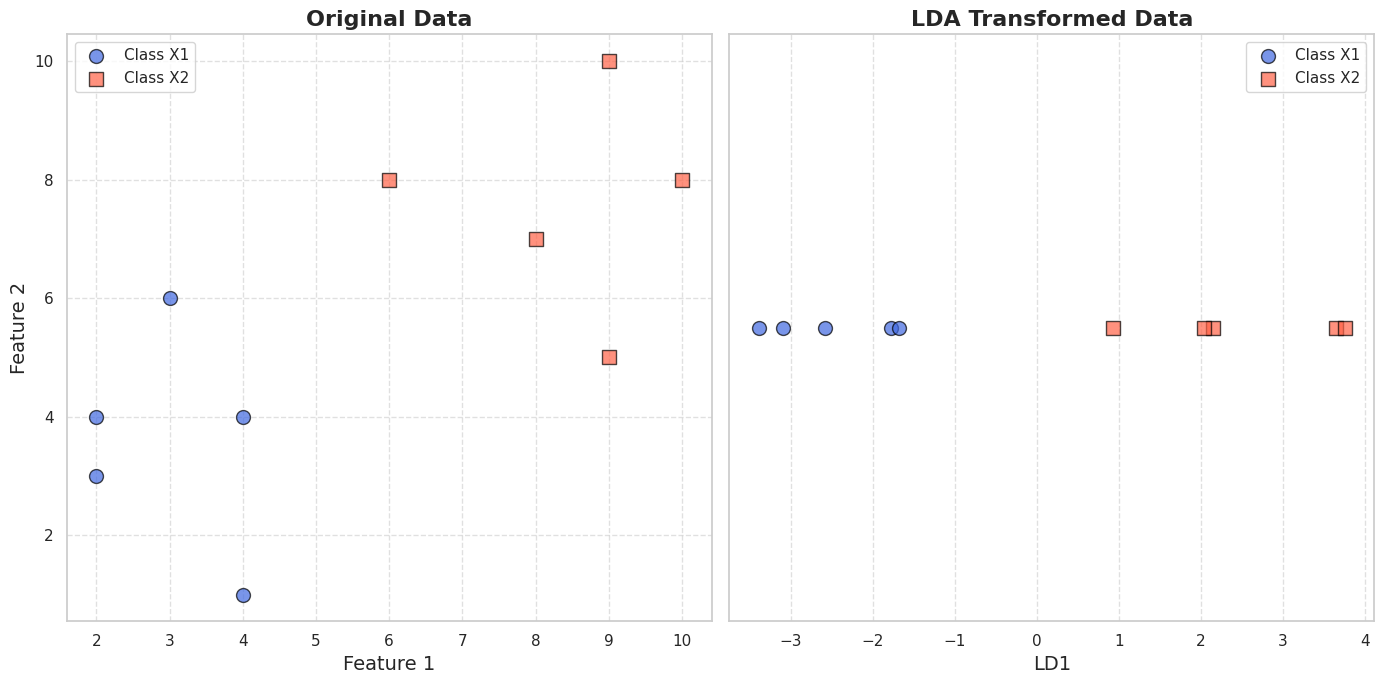

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Define the data
X1 = np.array([[4, 1], [2, 4], [2, 3], [3, 6], [4, 4]])
X2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]])
y1 = np.zeros(X1.shape[0])  # Class 0 for X1
y2 = np.ones(X2.shape[0])   # Class 1 for X2

# Combine the data
X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

# Apply LDA
lda = LDA(n_components=1)  # Reducing to 1 dimension
X_lda = lda.fit_transform(X, y)

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot the original and LDA-transformed data
plt.figure(figsize=(14, 7))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], color='royalblue', s=100, edgecolor='black', marker='o', alpha=0.7, label='Class X1')
plt.scatter(X2[:, 0], X2[:, 1], color='tomato', s=100, edgecolor='black', marker='s', alpha=0.7, label='Class X2')
plt.title('Original Data', fontsize=16, fontweight='bold')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# LDA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), color='royalblue', s=100, edgecolor='black', marker='o', alpha=0.7, label='Class X1')
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), color='tomato', s=100, edgecolor='black', marker='s', alpha=0.7, label='Class X2')
plt.title('LDA Transformed Data', fontsize=16, fontweight='bold')
plt.xlabel('LD1', fontsize=14)
plt.yticks([])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/WineQT.csv')


In [30]:
print("Original Data Sample:")
df.sample(5, random_state=1)

Original Data Sample:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
314,9.3,0.48,0.29,2.1,0.127,6.0,16.0,0.99680,3.22,0.72,11.2,5,447
698,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5,993
846,7.7,0.26,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,6,1198
1136,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,1590
1097,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,6,1535


In [32]:

# Convert 'quality' attribute to binary (0 = bad, 1 = good)
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 6 else 1)

# Display a sample of the modified data
print("\nData with 'quality' Converted:")
df.sample(5, random_state=1)




Data with 'quality' Converted:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
314,9.3,0.48,0.29,2.1,0.127,6.0,16.0,0.99680,3.22,0.72,11.2,0,447
698,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,0,993
846,7.7,0.26,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,0,1198
1136,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,0,1590
1097,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,0,1535


In [33]:

# Define columns to normalize, excluding 'quality'
columns_to_scale = df.columns.difference(['quality'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display a sample of the normalized data
print("\nNormalized Data Sample:")
print(df.sample(5, random_state=1).to_string(index=False))


Normalized Data Sample:
 fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  sulphates  alcohol  quality       Id
      0.415929          0.246575         0.29        0.082192   0.191987             0.074627              0.035336 0.494126 0.377953   0.233533 0.430769        0 0.279900
      0.221239          0.150685         0.28        0.075342   0.116861             0.447761              0.219081 0.504405 0.559055   0.089820 0.153846        0 0.621791
      0.274336          0.095890         0.26        0.075342   0.066778             0.268657              0.250883 0.369310 0.322835   0.275449 0.384615        0 0.750157
      0.150442          0.294521         0.15        0.061644   0.108514             0.373134              0.102473 0.225404 0.456693   0.293413 0.492308        0 0.995617
      0.212389          0.294521         0.13        0.089041   0.105175             0.208955              0.102473